# Exploring predictive models for Diabetes diagnosis

**Introduction**

Diabetes mellitus, a chronic metabolic disorder, affects millions worldwide, posing significant health challenges. Early detection and intervention are crucial in managing this condition effectively. In this project, we delve into an in-depth analysis of a comprehensive dataset sourced from the Pima Indian community, aiming to explore patterns and build predictive models for diabetes diagnosis.

The dataset comprises various health-related indicators, such as glucose levels, blood pressure, BMI, insulin levels, and more, collected from individuals within the Pima Indian community. Our objective is to harness these indicators to create robust predictive models capable of identifying the likelihood of an individual developing diabetes within a five-year span. All subjects in this dataset are females older than 21y.

**Objectives**

1. **Exploratory Analysis:** Conduct a thorough exploratory analysis of the dataset, unveiling trends, distributions, and potential correlations among health indicators.
2. **Data Preprocessing:** Cleanse and preprocess the dataset, handling missing values, outliers, and ensuring data quality for modeling.
3. **Feature Engineering:** Extract meaningful insights from the existing features and possibly create new informative variables to enhance predictive capabilities.
4. **Model Development:** Employ various machine learning algorithms to develop and compare predictive models for diabetes diagnosis.
5. **Evaluation and Validation:** Assess model performance using appropriate metrics, validate against test data, and fine-tune models for optimal accuracy and generalization.

**Significance**

Understanding and predicting the onset of diabetes can revolutionize healthcare interventions, enabling timely treatments and lifestyle modifications. This project aims to contribute to this crucial area by leveraging advanced analytics to create reliable predictive tools, potentially aiding healthcare professionals in proactive patient care and management.

The findings and models generated through this project could have substantial implications in the realm of preventive medicine and personalized healthcare strategies, potentially mitigating the impact of diabetes through early identification and targeted interventions.

## Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

diabetes = pd.read_csv('diabetes.csv')

## Understanding the dataset

### Dataset info
**Column Information**
- `Pregnancies`: Number of pregnancies that might indicate the population's general reproductive history.
- `Glucose`: Plasma Glucose concentration of 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure (mmHg)
- `SkinThickness`: Skin fold thickness (mm)
- `Insulin`: 2 hour serum insulin(mu U/ml)
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: A function that scores likelihood of diabetes based on family history. This function could reveal the genetic predisposition to diabetes.
- `Age`: Age in years
- `Outcome`: Target column indicating diabetes (0 for non-diabetic, 1 for diabetic)

**Data Types**
- Majority columns: `int64` (representing counts or measurements)
- Two columns: `float64` (likely containing decimal values)

**Missing Values**

No missing values detected (all columns have 768 non-null entries).

In [2]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Dataset description

- `Pregnancies`: The average number of pregnancies is around 3.85, with a standard deviation of approximately 3.37.
- `Glucose, Blood Pressure, Skin Thickness, Insulin, BMI`: These health indicators vary widely in their means and standard deviations.
- `Diabetes Pedigree Function`: The mean is approximately 0.472, with values ranging from 0.078 to 2.42.
- `Age`: The mean age is approximately 33.24 years, with the youngest at 21 and oldest at 81.
- `Outcome`: The mean suggests around 35% of individuals in the dataset have been diagnosed with diabetes.,
- `Wide Range`: There are instances where minimum values are zero (which might represent missing or erroneous data) for certain health indicators like Glucose, Blood Pressure, Skin Thickness, Insulin, and BMI.
- `High Variability`: Some features like Insulin have a high standard deviation, indicating significant variability or potential outliers.
- `Target Distribution`: The mean of the 'Outcome' column indicates a higher percentage of non-diabetic cases (Outcome = 0).

Having values = 0 in columns like Insulin and BMI does not make sense. This is surely an error and we will have to treat it before modeling. Also the value 846 seems way off for an Insulin level column.

In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 0 values

In [4]:
print("0's in each column")
print("BloodPressure:", diabetes[diabetes['BloodPressure']==0].shape[0])
print("Glucose:", diabetes[diabetes['Glucose']==0].shape[0])
print("SkinThickness:", diabetes[diabetes['SkinThickness']==0].shape[0])
print("Insulin:", diabetes[diabetes['Insulin']==0].shape[0])
print("BMI:", diabetes[diabetes['BMI']==0].shape[0])

diabetes['Glucose'] = diabetes['Glucose'].replace(0,diabetes['Glucose'].mean())#normal distribution
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].mean())#normal distribution
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].median())#skewed distribution
diabetes['Insulin'] = diabetes['Insulin'].replace(0,diabetes['Insulin'].median())#skewed distribution
diabetes['BMI'] = diabetes['BMI'].replace(0,diabetes['BMI'].median())#skewed distribution

0's in each column
BloodPressure: 35
Glucose: 5
SkinThickness: 227
Insulin: 374
BMI: 11


## Visualizing the data

### Scatter matrix

c:\Users\Mantovani\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


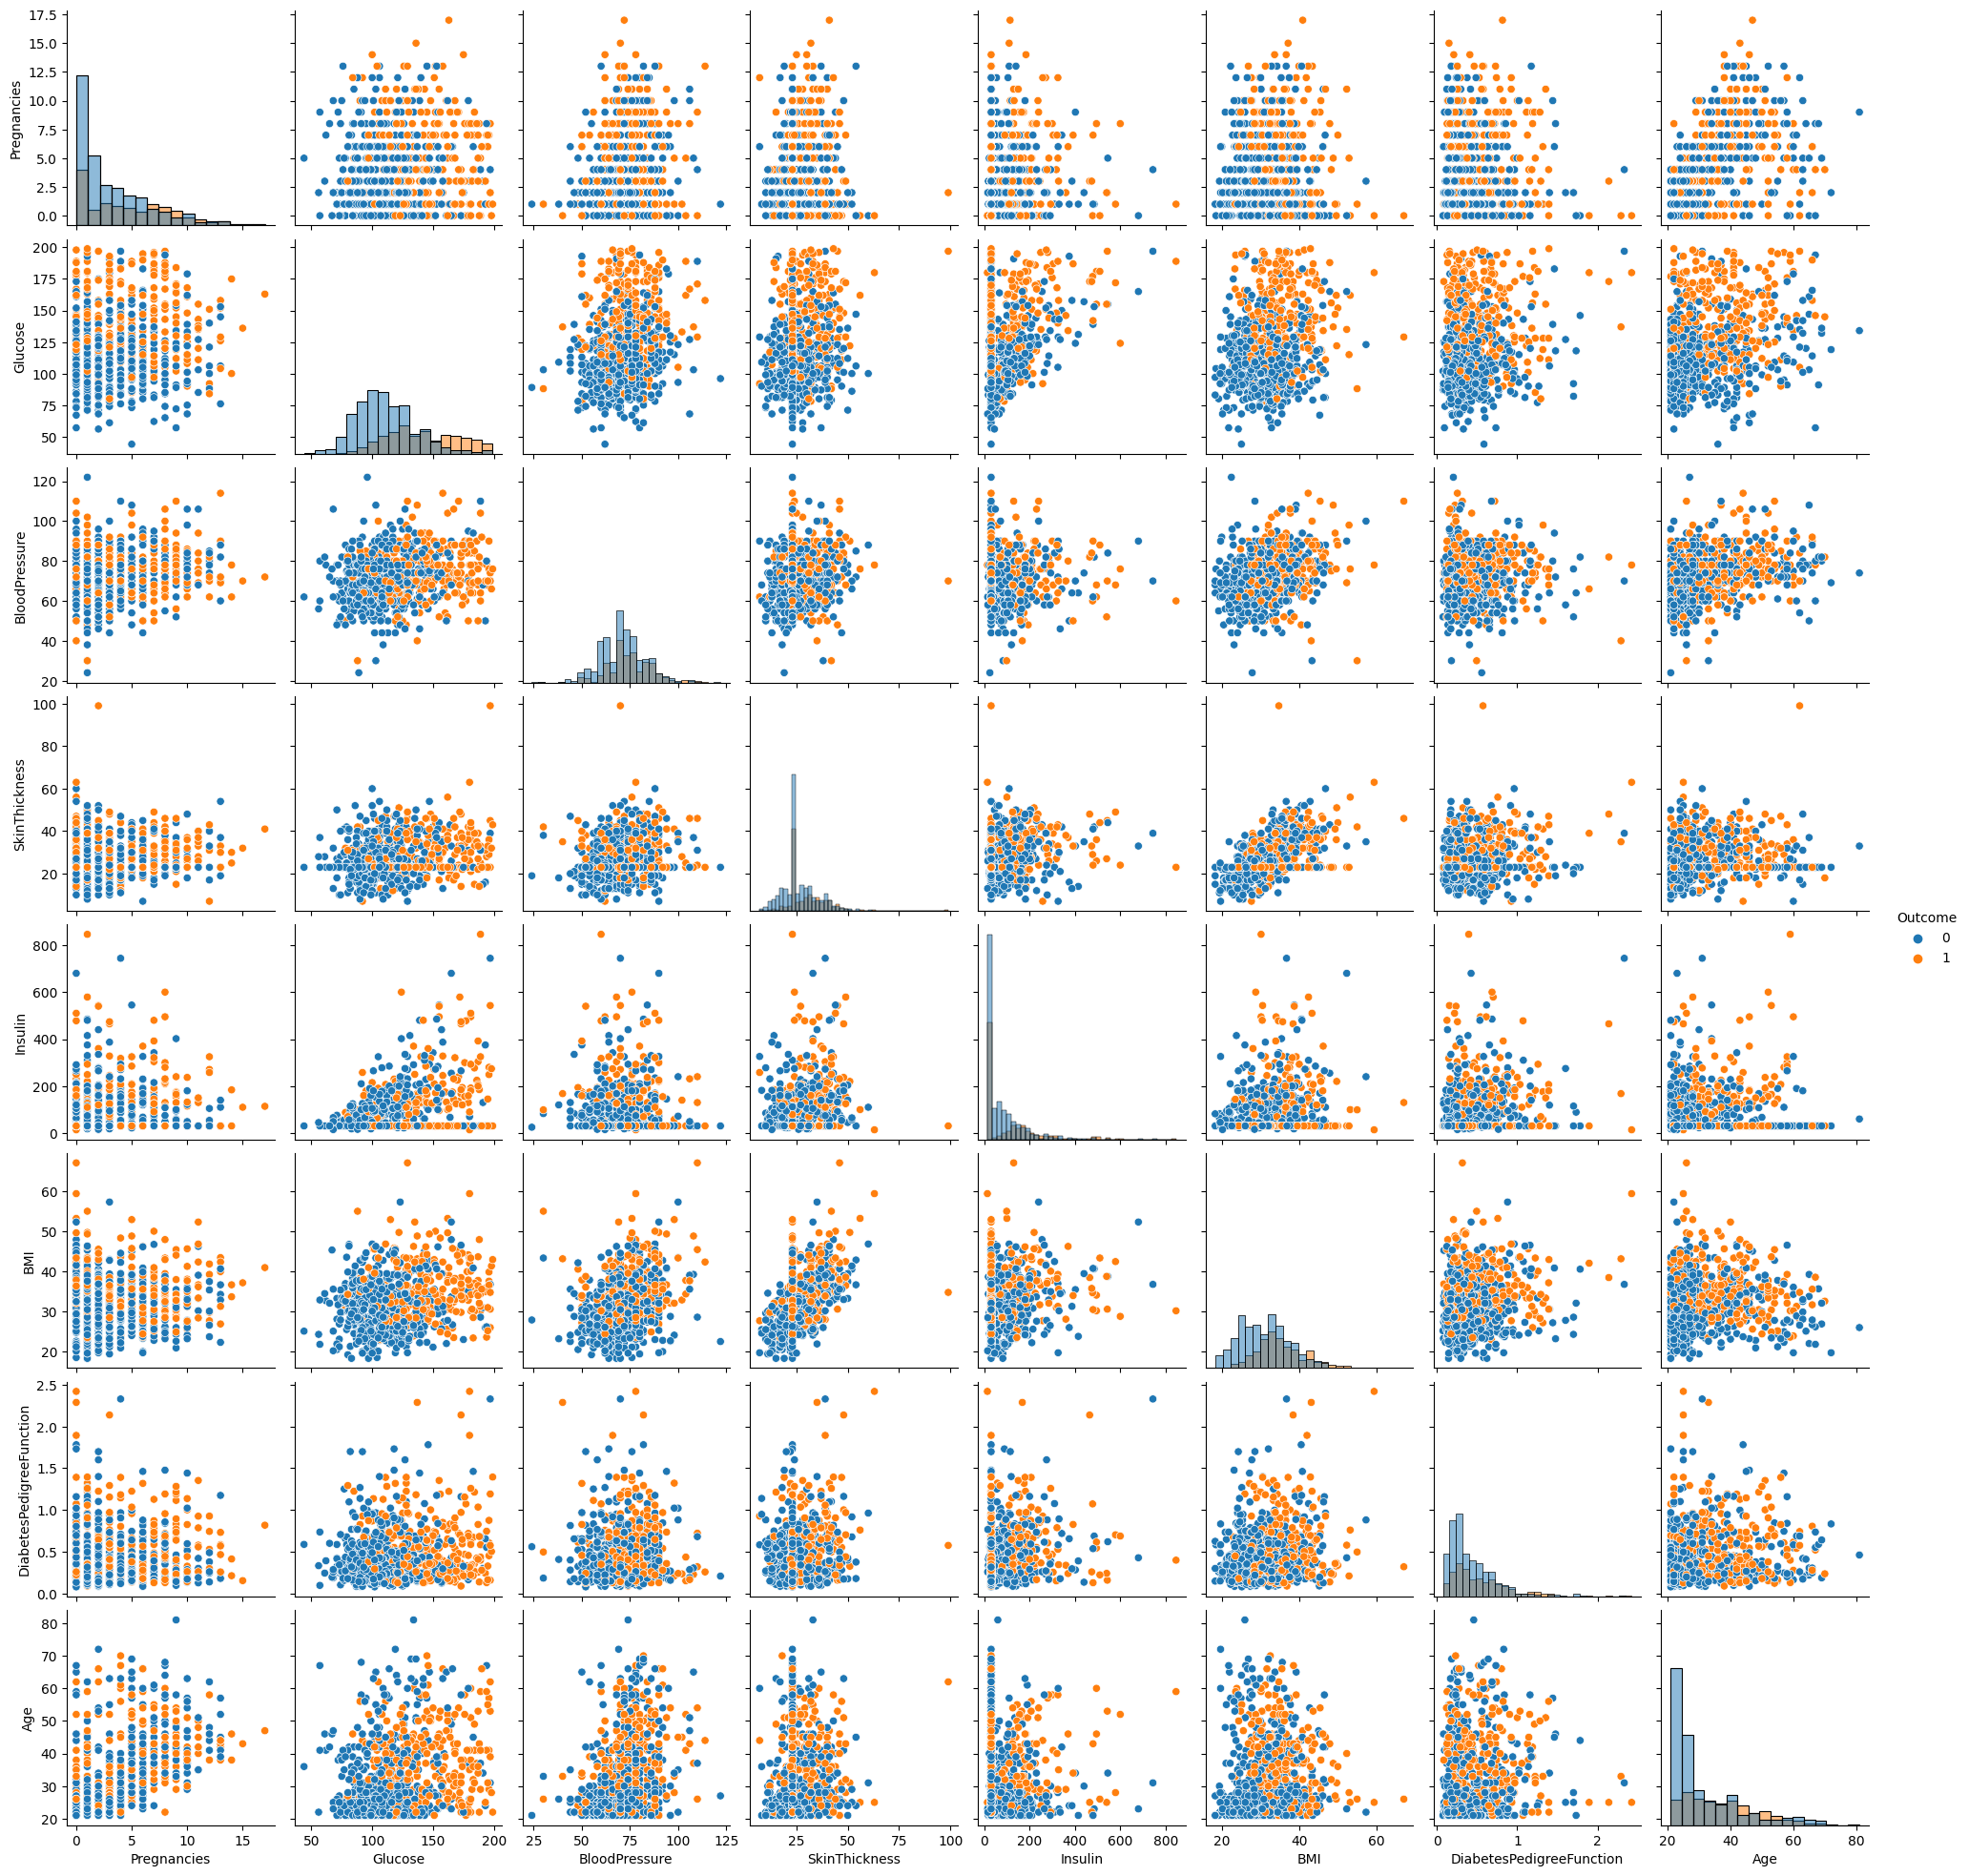

In [5]:
sns.pairplot(diabetes, hue='Outcome', diag_kind='hist')
plt.show()

### Correlation plot

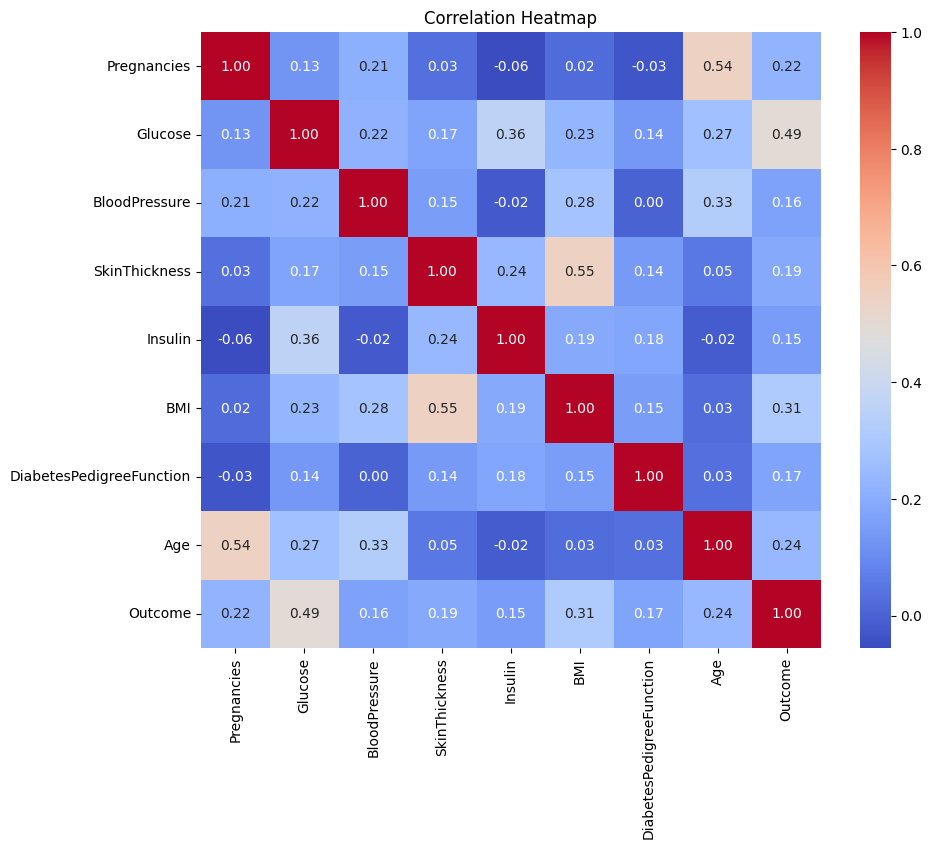

In [6]:
correlation_matrix = diabetes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

### Histograms

<Axes: xlabel='DiabetesPedigreeFunction'>

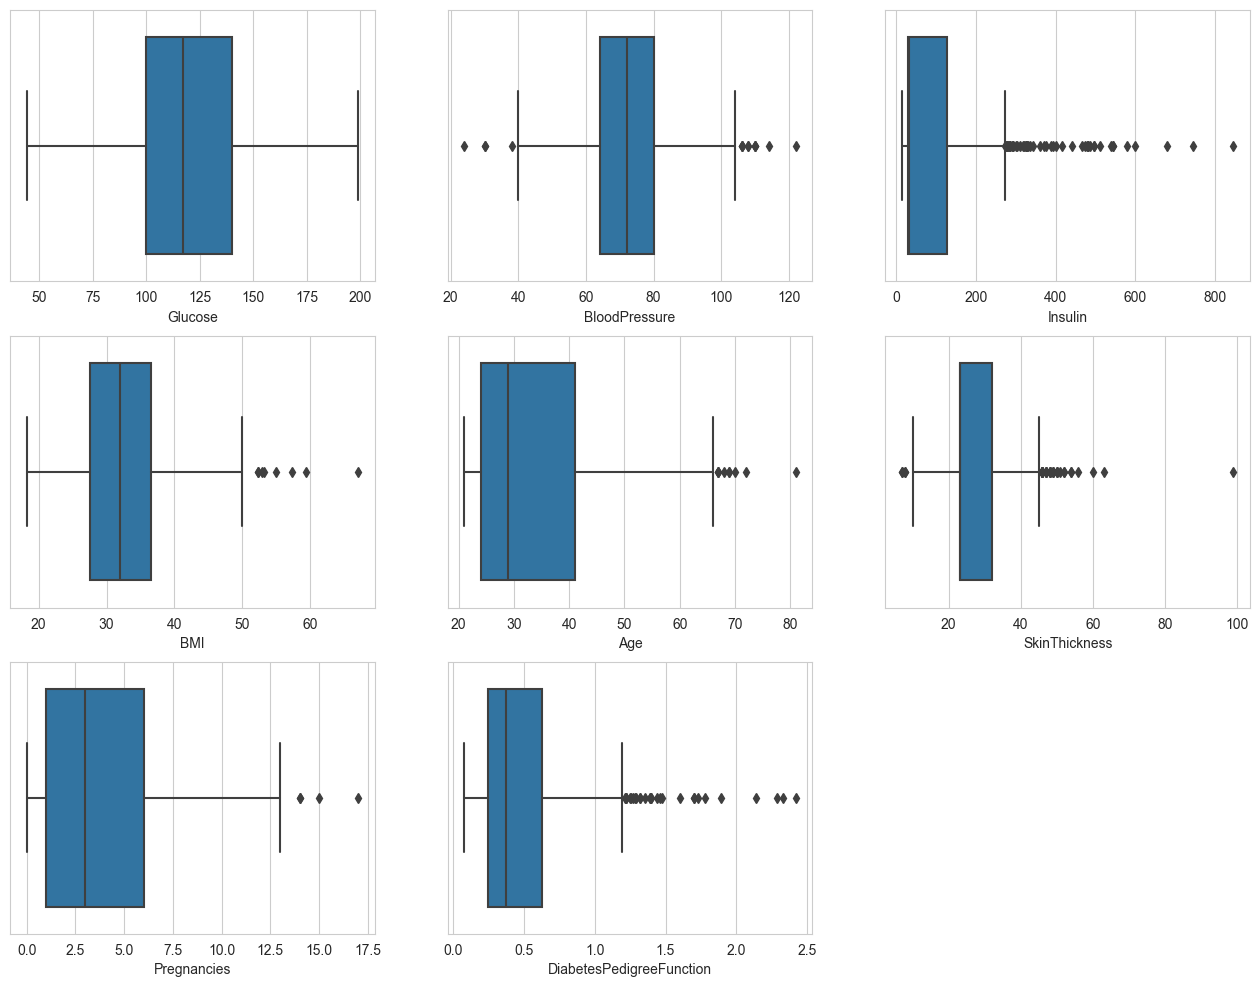

In [7]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=diabetes)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=diabetes)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=diabetes)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=diabetes)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=diabetes)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=diabetes)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=diabetes)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=diabetes)

## Modelling data

https://joaoclaudionc.medium.com/como-saber-se-os-%C3%ADndios-pima-v%C3%A3o-ter-diabetes-por-meio-de-machine-learning-3dbbaa03a019

In [8]:
from sklearn.model_selection import train_test_split

X = diabetes[['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

### Feature Selection

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming 'X' is your feature matrix and 'y' is the target variable
X = diabetes.drop('Outcome', axis=1)  # Features
y = diabetes['Outcome']  # Target

# Select top k features using f_classif (ANOVA F-value)
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
selected_features

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age'], dtype='object')

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # Example model

# Example using Logistic Regression as the estimator
estimator = LogisticRegression(max_iter=1000)  # Estimator/model
k = 5  # Number of features to select
rfe_selector = RFE(estimator=estimator, n_features_to_select=k)
X_rfe = rfe_selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices_rfe = rfe_selector.get_support(indices=True)
selected_features_rfe = X.columns[selected_indices_rfe]
selected_features_rfe

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

### KNN (K-Nearest Neighbors)

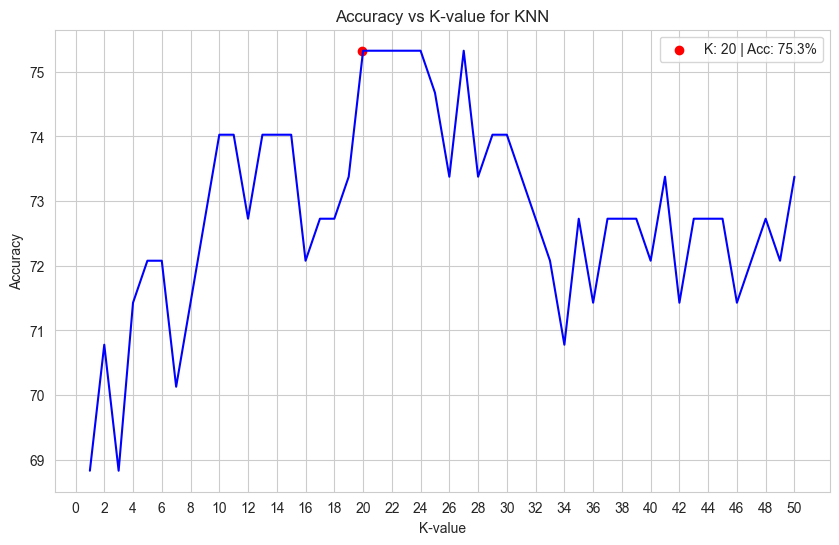

Accuracy: 75.3%

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        97
           1       0.73      0.53      0.61        57

    accuracy                           0.75       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.75      0.74       154

Confusion Matrix
 [[86 11]
 [27 30]]


In [11]:
from sklearn.neighbors import KNeighborsClassifier

KNN_results = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())  # Using ravel() to convert to 1D array
    yhat = knn.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    KNN_results.append({'K-value': k, 'Accuracy': accuracy*100})

KNN_accuracy_df = pd.DataFrame(KNN_results)

# Find index of maximum accuracy
KNN_max_index = KNN_accuracy_df['Accuracy'].idxmax()
KNN_k_max = int(KNN_accuracy_df.loc[KNN_max_index]['K-value'])
KNN_acc_max = KNN_accuracy_df.loc[KNN_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(KNN_accuracy_df['K-value'], KNN_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K-value for KNN')
plt.scatter(KNN_k_max-0.05, KNN_acc_max, color='red', label=f'K: {KNN_k_max:.0f} | Acc: {KNN_acc_max:.1f}%')
plt.legend()
plt.xticks(range(0, 51, 2))
plt.grid(True)
plt.show()

# Creating the model using the optimum value for K
KNN_model = KNeighborsClassifier(n_neighbors = KNN_k_max)
KNN_model.fit(X_train, y_train.values.ravel())
KNN_pred = KNN_model.predict(X_test)
KNN_accuracy = accuracy_score(y_test.values.ravel(), KNN_pred)
KNN_cr = classification_report(y_test.values.ravel(), KNN_pred)
KNN_cm = confusion_matrix(y_test.values.ravel(), KNN_pred)

# Printing the metrics
print("Accuracy:", f"{KNN_accuracy * 100:.1f}%\n")
print("Classification Report\n", KNN_cr)
print("Confusion Matrix\n", KNN_cm)

### Decision Trees

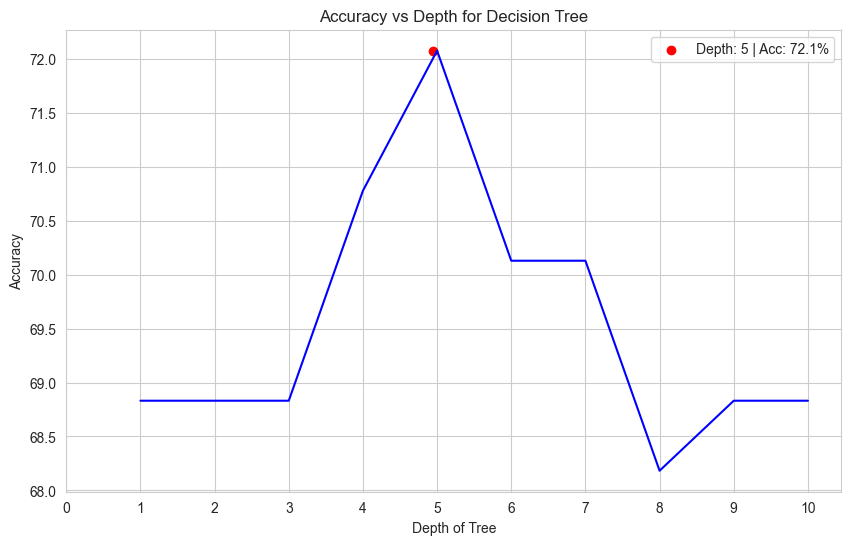

Accuracy: 72.1%

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.87      0.80        97
           1       0.68      0.47      0.56        57

    accuracy                           0.72       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154

Confusion Matrix
 [[84 13]
 [30 27]]


In [12]:
from sklearn.tree import DecisionTreeClassifier

DT_results = []

for i in range(1,11):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train, y_train.values.ravel())
    yhat = clf_tree.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    DT_results.append({'Depth': i, 'Accuracy': accuracy*100})
    
DT_accuracy_df = pd.DataFrame(DT_results)

# Find index of maximum accuracy
DT_max_index = DT_accuracy_df['Accuracy'].idxmax()
DT_depth_max = int(DT_accuracy_df.loc[DT_max_index]['Depth'])
DT_acc_max = DT_accuracy_df.loc[DT_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(DT_accuracy_df['Depth'], DT_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth for Decision Tree')
plt.scatter(DT_depth_max-0.05, DT_acc_max, color='red', label=f'Depth: {DT_depth_max:.0f} | Acc: {DT_acc_max:.1f}%')
plt.legend()
plt.xticks(range(0, 11, 1))
plt.grid(True)
plt.show()

# Creating the model using the optimum value for Depth
DT_model = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = DT_depth_max)
DT_model.fit(X_train, y_train.values.ravel())
DT_pred = DT_model.predict(X_test)
DT_accuracy = accuracy_score(y_test.values.ravel(), DT_pred)
DT_cr = classification_report(y_test.values.ravel(), DT_pred)
DT_cm = confusion_matrix(y_test.values.ravel(), DT_pred)

# Printing the metrics
print("Accuracy:", f"{DT_accuracy * 100:.1f}%\n")
print("Classification Report\n", DT_cr)
print("Confusion Matrix\n", DT_cm)

### Random Forest

Best combination
Depth          6.000000
Estimators    12.000000
Accuracy      79.220779
Name: 86, dtype: float64


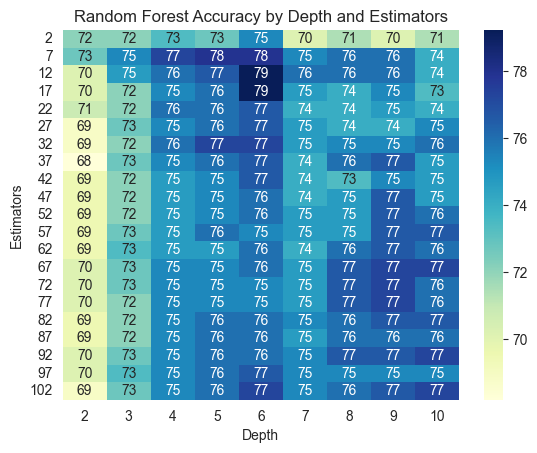

Accuracy: 79.2%

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.75      0.67      0.70        57

    accuracy                           0.79       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix
 [[84 13]
 [19 38]]


In [13]:
from sklearn.ensemble import RandomForestClassifier

max_depth_values = list(range(2, 11))  # Test max_depth from 2 to 10
n_estimators_values = list(range(2, 103, 5))  # Test n_estimators from 2 to 102 with step size 5

RF_results = []

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        clf_forest = RandomForestClassifier(
            n_estimators=n_estimators, 
            criterion="entropy", 
            random_state=100, 
            max_depth=max_depth
        )
        clf_forest.fit(X_train, y_train.values.ravel())
        yhat = clf_forest.predict(X_test)
        accuracy = accuracy_score(y_test, yhat)
        RF_results.append({'Depth': max_depth, 'Estimators': n_estimators, 'Accuracy': accuracy*100})

RF_accuracy_df = pd.DataFrame(RF_results)

# Find index of maximum accuracy
RF_max_index = RF_accuracy_df['Accuracy'].idxmax()
RF_depth_max = int(RF_accuracy_df.loc[RF_max_index]['Depth'])
RF_estimators_max = int(RF_accuracy_df.loc[RF_max_index]['Estimators'])
RF_acc_max = RF_accuracy_df.loc[RF_max_index]['Accuracy']

# Visualizing the best combination
print("Best combination")
print(RF_accuracy_df.loc[RF_accuracy_df['Accuracy'].idxmax()])

# Visualizing all the combinations
RF_pivot_table = pd.pivot_table(RF_accuracy_df, values='Accuracy', index='Estimators', columns='Depth')
sns.heatmap(RF_pivot_table, cmap='YlGnBu', annot=True)
plt.title('Random Forest Accuracy by Depth and Estimators')
plt.xlabel('Depth')
plt.ylabel('Estimators')
plt.show()

# Creating the model using the optimum value for Depth
RF_model = RandomForestClassifier(n_estimators=RF_estimators_max, criterion="entropy", random_state=100, max_depth=RF_depth_max)
RF_model.fit(X_train, y_train.values.ravel())
RF_pred = RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test.values.ravel(), RF_pred)
RF_cr = classification_report(y_test.values.ravel(), RF_pred)
RF_cm = confusion_matrix(y_test.values.ravel(), RF_pred)

# Printing the metrics
print("Accuracy:", f"{RF_accuracy * 100:.1f}%\n")
print("Classification Report\n", RF_cr)
print("Confusion Matrix\n", RF_cm)

### Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

# Unlike the other models, Naive Bayes has no parameters that need tuning
NB_model = GaussianNB()
NB_model.fit(X_train, y_train.values.ravel())
NB_pred = NB_model.predict(X_test)
NB_accuracy = accuracy_score(y_test.values.ravel(), NB_pred)
NB_cr = classification_report(y_test.values.ravel(), NB_pred)
NB_cm = confusion_matrix(y_test.values.ravel(), NB_pred)

# Printing the metrics
print("Accuracy:", f"{NB_accuracy * 100:.1f}%\n")
print("Classification Report\n", NB_cr)
print("Confusion Matrix\n", NB_cm)

Accuracy: 76.0%

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        97
           1       0.71      0.60      0.65        57

    accuracy                           0.76       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.76      0.75       154

Confusion Matrix
 [[83 14]
 [23 34]]


### Logistic Regression

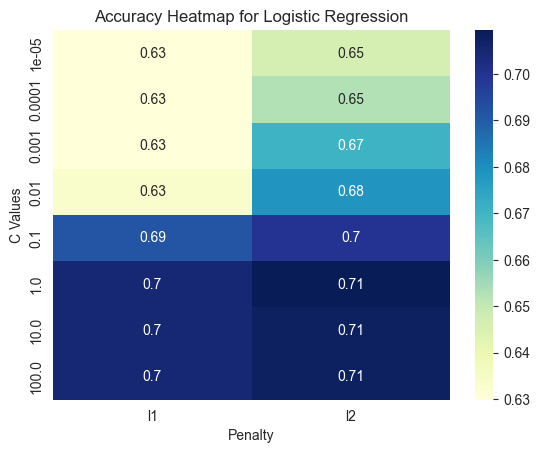

Best hyperparameters
C              0.01
Solver        lbfgs
Penalty          l2
Accuracy    0.75974
Name: 23, dtype: object

Accuracy: 76.0%

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        97
           1       0.72      0.58      0.64        57

    accuracy                           0.76       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.76      0.75       154

Confusion Matrix
 [[84 13]
 [24 33]]


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define ranges for hyperparameters
penalty_values = ['l1', 'l2']
C_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]  # List of C values to test
solver_values = ['liblinear', 'saga', 'sag', 'lbfgs']  # Different solvers supporting both 'l1' and 'l2' penalties

# Perform grid search
LR_results = []

for params in ParameterGrid({'penalty': penalty_values, 'C': C_values, 'solver': solver_values}):
    if (params['solver'] in ['lbfgs', 'sag']) and params['penalty'] == 'l1':
        continue  # Skip 'lbfgs' and 'sag' solvers with 'l1' penalty
    clf_lr = LogisticRegression(**params)
    clf_lr.fit(X_train, y_train.values.ravel())
    yhat = clf_lr.predict(X_test)
    accuracy = accuracy_score(y_test.values.ravel(), yhat)
    LR_results.append({'Penalty': params['penalty'], 'C': params['C'], 'Solver': params['solver'], 'Accuracy': accuracy})

LR_results_df = pd.DataFrame(LR_results)

# Find the row index with the maximum accuracy
best_row_index = LR_results_df['Accuracy'].idxmax()

# Get the corresponding hyperparameters for the best result
best_hyperparameters = LR_results_df.loc[best_row_index, ['C', 'Solver', 'Penalty', 'Accuracy']]
best_C = best_hyperparameters['C']
best_solver = best_hyperparameters['Solver']
best_penalty = best_hyperparameters['Penalty']

print("Best hyperparameters")
print(best_hyperparameters)

# Fitting the model with the best hyperparameters
LR_model = LogisticRegression(C=best_C, solver=best_solver, penalty=best_penalty)
LR_model.fit(X_train, y_train.values.ravel())
LR_pred = LR_model.predict(X_test)
LR_accuracy = accuracy_score(y_test.values.ravel(), LR_pred)
LR_cr = classification_report(y_test.values.ravel(), LR_pred)
LR_cm = confusion_matrix(y_test.values.ravel(), LR_pred)

# Printing the metrics
print("\nAccuracy:", f"{LR_accuracy * 100:.1f}%\n")
print("Classification Report\n", LR_cr)
print("Confusion Matrix\n", LR_cm)

### Stochastic Gradient Descent (SGD)

In [16]:
from sklearn.linear_model import SGDClassifier

# Define hyperparameters for grid search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'loss': ['hinge', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2'],
}

# Initialize SGDClassifier
sgd = SGDClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("\n")

# Fit a model using the best parameters
SGD_model = SGDClassifier(**best_params)
SGD_model.fit(X_train, y_train.values.ravel())
SGD_pred = SGD_model.predict(X_test)
SGD_accuracy = accuracy_score(y_test, SGD_pred)
SGD_cr = classification_report(y_test.values.ravel(), SGD_pred)
SGD_cm = confusion_matrix(y_test.values.ravel(), SGD_pred)

# Printing the metrics
print("Accuracy:", f"{SGD_accuracy * 100:.1f}%\n")
print("Classification Report\n", SGD_cr)
print("Confusion Matrix\n", SGD_cm)

Best Parameters: {'alpha': 1, 'loss': 'squared_hinge', 'penalty': 'l2'}
Best Score: 0.749193655870985


Accuracy: 72.7%

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        97
           1       0.64      0.60      0.62        57

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.72      0.73      0.73       154

Confusion Matrix
 [[78 19]
 [23 34]]


### XGBoost

In [17]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the grid of parameters to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term (alpha)
    'reg_lambda': [0, 0.1, 0.5],  # L2 regularization term (lambda)
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters and fit a model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
XGB_model = xgb.XGBClassifier(**best_params)
XGB_model.fit(X_train, y_train.values.ravel())
XGB_pred = XGB_model.predict(X_test)
XGB_accuracy = accuracy_score(y_test, XGB_pred)
XGB_cr = classification_report(y_test.values.ravel(), XGB_pred)
XGB_cm = confusion_matrix(y_test.values.ravel(), XGB_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{XGB_accuracy * 100:.1f}%\n")
print("Classification Report\n", XGB_cr)
print("Confusion Matrix\n", XGB_cm)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.5}


Accuracy: 74.0%

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.90      0.81        97
           1       0.73      0.47      0.57        57

    accuracy                           0.74       154
   macro avg       0.74      0.69      0.69       154
weighted avg       0.74      0.74      0.72       154

Confusion Matrix
 [[87 10]
 [30 27]]


### Perceptron

In [18]:
from sklearn.linear_model import Perceptron

# Define the Perceptron classifier
perceptron_classifier = Perceptron(random_state=42)

# Define the grid of parameters to search
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=perceptron_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)

# Fit a model with the best params
perceptron_classifier = Perceptron(**best_params)
perceptron_classifier.fit(X_train, y_train.values.ravel())

# Make predictions on test data
perceptron_pred = perceptron_classifier.predict(X_test)
perceptron_accuracy = accuracy_score(y_test.values.ravel(), perceptron_pred)
perceptron_cr = classification_report(y_test.values.ravel(), perceptron_pred)
perceptron_cm = confusion_matrix(y_test.values.ravel(), perceptron_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{perceptron_accuracy * 100:.1f}%\n")
print("Classification Report\n", perceptron_cr)
print("Confusion Matrix\n", perceptron_cm)

Best Parameters: {'alpha': 0.0001}


Accuracy: 66.2%

Classification Report
               precision    recall  f1-score   support

           0       0.69      0.85      0.76        97
           1       0.57      0.35      0.43        57

    accuracy                           0.66       154
   macro avg       0.63      0.60      0.60       154
weighted avg       0.65      0.66      0.64       154

Confusion Matrix
 [[82 15]
 [37 20]]


### Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
param_grid_gbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search_gbm = GridSearchCV(gbm, param_grid=param_grid_gbm, cv=5)
grid_search_gbm.fit(X_train, y_train.values.ravel())

best_gbm = grid_search_gbm.best_estimator_
best_gbm.fit(X_train, y_train.values.ravel())
gbm_pred = best_gbm.predict(X_test)
gbm_accuracy = accuracy_score(y_test.values.ravel(), gbm_pred)
gbm_cr = classification_report(y_test.values.ravel(), gbm_pred)
gbm_cm = confusion_matrix(y_test.values.ravel(), gbm_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{gbm_accuracy * 100:.1f}%\n")
print("Classification Report\n", gbm_cr)
print("Confusion Matrix\n", gbm_cm)



Accuracy: 74.7%

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        97
           1       0.74      0.49      0.59        57

    accuracy                           0.75       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.75      0.75      0.73       154

Confusion Matrix
 [[87 10]
 [29 28]]


### AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

grid_search_adaboost = GridSearchCV(adaboost, param_grid=param_grid_adaboost, cv=5)
grid_search_adaboost.fit(X_train, y_train.values.ravel())

best_adaboost = grid_search_adaboost.best_estimator_
best_adaboost.fit(X_train, y_train.values.ravel())
adaboost_pred = best_adaboost.predict(X_test)
adaboost_accuracy = accuracy_score(y_test.values.ravel(), adaboost_pred)
adaboost_cr = classification_report(y_test.values.ravel(), adaboost_pred)
adaboost_cm = confusion_matrix(y_test.values.ravel(), adaboost_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{adaboost_accuracy * 100:.1f}%\n")
print("Classification Report\n", adaboost_cr)
print("Confusion Matrix\n", adaboost_cm)



Accuracy: 76.0%

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        97
           1       0.71      0.60      0.65        57

    accuracy                           0.76       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.76      0.75       154

Confusion Matrix
 [[83 14]
 [23 34]]


### Bagging

In [21]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier()
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

grid_search_bagging = GridSearchCV(bagging, param_grid=param_grid_bagging, cv=5)
grid_search_bagging.fit(X_train, y_train.values.ravel())

best_bagging = grid_search_bagging.best_estimator_
best_bagging.fit(X_train, y_train.values.ravel())
bagging_pred = best_bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test.values.ravel(), bagging_pred)
bagging_cr = classification_report(y_test.values.ravel(), bagging_pred)
bagging_cm = confusion_matrix(y_test.values.ravel(), bagging_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{bagging_accuracy * 100:.1f}%\n")
print("Classification Report\n", bagging_cr)
print("Confusion Matrix\n", bagging_cm)



Accuracy: 74.7%

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        97
           1       0.70      0.56      0.62        57

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

Confusion Matrix
 [[83 14]
 [25 32]]


### Extra Trees

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees = ExtraTreesClassifier()
param_grid_extra_trees = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search_extra_trees = GridSearchCV(extra_trees, param_grid=param_grid_extra_trees, cv=5)
grid_search_extra_trees.fit(X_train, y_train.values.ravel())

best_extra_trees = grid_search_extra_trees.best_estimator_
best_extra_trees.fit(X_train, y_train.values.ravel())
extra_trees_pred = best_extra_trees.predict(X_test)
extra_trees_accuracy = accuracy_score(y_test.values.ravel(), extra_trees_pred)
extra_trees_cr = classification_report(y_test.values.ravel(), extra_trees_pred)
extra_trees_cm = confusion_matrix(y_test.values.ravel(), extra_trees_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{extra_trees_accuracy * 100:.1f}%\n")
print("Classification Report\n", extra_trees_cr)
print("Confusion Matrix\n", extra_trees_cm)



Accuracy: 75.3%

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        97
           1       0.73      0.53      0.61        57

    accuracy                           0.75       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.75      0.74       154

Confusion Matrix
 [[86 11]
 [27 30]]


### Multi-Layer Perceptron

In [23]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier()
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search_mlp = GridSearchCV(mlp_classifier, param_grid=param_grid_mlp, cv=5)
grid_search_mlp.fit(X_train, y_train.values.ravel())

best_mlp = grid_search_mlp.best_estimator_
best_mlp.fit(X_train, y_train.values.ravel())
mlp_pred = best_mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test.values.ravel(), mlp_pred)
mlp_cr = classification_report(y_test.values.ravel(), mlp_pred)
mlp_cm = confusion_matrix(y_test.values.ravel(), mlp_pred)

# Printing the metrics
print("\n")
print("Accuracy:", f"{mlp_accuracy * 100:.1f}%\n")
print("Classification Report\n", mlp_cr)
print("Confusion Matrix\n", mlp_cm)



Accuracy: 64.9%

Classification Report
               precision    recall  f1-score   support

           0       0.65      0.97      0.78        97
           1       0.67      0.11      0.18        57

    accuracy                           0.65       154
   macro avg       0.66      0.54      0.48       154
weighted avg       0.66      0.65      0.56       154

Confusion Matrix
 [[94  3]
 [51  6]]


### Gaussian Process

In [24]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Define the Gaussian Process Classifier
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel)

# Define the grid of parameters to search
param_grid_gpc = {
    "max_iter_predict": [100, 200, 300],
    # Add more parameters to be tuned as needed for the GPC model
}

# Perform Grid Search with cross-validation
grid_search_gpc = GridSearchCV(estimator=gpc, param_grid=param_grid_gpc, cv=3, scoring='accuracy')
grid_search_gpc.fit(X_train, y_train.values.ravel())

# Get the best parameters and the corresponding accuracy
best_params_gpc = grid_search_gpc.best_params_
best_accuracy_gpc = grid_search_gpc.best_score_

print("Best Parameters for Gaussian Process Classifier:", best_params_gpc)

# Fit a model with the best params
gpc = GaussianProcessClassifier(**best_params_gpc)
gpc.fit(X_train, y_train.values.ravel())

# Make predictions on test data
gpc_pred = gpc.predict(X_test)
gpc_accuracy = accuracy_score(y_test.values.ravel(), gpc_pred)
gpc_cr = classification_report(y_test.values.ravel(), gpc_pred)
gpc_cm = confusion_matrix(y_test.values.ravel(), gpc_pred)

# Printing the metrics for GPC
print("Accuracy:", f"{gpc_accuracy * 100:.1f}%\n")
print("Classification Report\n", gpc_cr)
print("Confusion Matrix\n", gpc_cm)

Best Parameters for Gaussian Process Classifier: {'max_iter_predict': 100}
Accuracy: 69.5%

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.78      0.76        97
           1       0.60      0.54      0.57        57

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.69      0.69      0.69       154

Confusion Matrix
 [[76 21]
 [26 31]]


### Quadratic Discriminant Analysis

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Define the Quadratic Discriminant Analysis model
qda = QuadraticDiscriminantAnalysis()

# Define the grid of parameters to search
param_grid_qda = {
    "tol": [0.0001, 0.001, 0.01],
    # Add more parameters to be tuned as needed for the QDA model
}

# Perform Grid Search with cross-validation
grid_search_qda = GridSearchCV(estimator=qda, param_grid=param_grid_qda, cv=3, scoring='accuracy')
grid_search_qda.fit(X_train, y_train.values.ravel())

# Get the best parameters and the corresponding accuracy
best_params_qda = grid_search_qda.best_params_
best_accuracy_qda = grid_search_qda.best_score_

print("Best Parameters for Quadratic Discriminant Analysis:", best_params_qda)

# Fit a model with the best params
qda = QuadraticDiscriminantAnalysis(**best_params_qda)
qda.fit(X_train, y_train.values.ravel())

# Make predictions on test data
qda_pred = qda.predict(X_test)
qda_accuracy = accuracy_score(y_test.values.ravel(), qda_pred)
qda_cr = classification_report(y_test.values.ravel(), qda_pred)
qda_cm = confusion_matrix(y_test.values.ravel(), qda_pred)

# Printing the metrics for QDA
print("Accuracy:", f"{qda_accuracy * 100:.1f}%\n")
print("Classification Report\n", qda_cr)
print("Confusion Matrix\n", qda_cm)

Best Parameters for Quadratic Discriminant Analysis: {'tol': 0.0001}
Accuracy: 74.7%

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        97
           1       0.70      0.54      0.61        57

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154

Confusion Matrix
 [[84 13]
 [26 31]]


### CatBoost

In [27]:
from catboost import CatBoostClassifier

# Define the CatBoost Classifier
catboost = CatBoostClassifier(verbose=False)

# Define the grid of parameters to search
param_grid_catboost = {
    "depth": [4, 6, 8],
    # Add more parameters to be tuned as needed for the CatBoost model
}

# Perform Grid Search with cross-validation
grid_search_catboost = GridSearchCV(estimator=catboost, param_grid=param_grid_catboost, cv=3, scoring='accuracy')
grid_search_catboost.fit(X_train, y_train.values.ravel())

# Get the best parameters and the corresponding accuracy
best_params_catboost = grid_search_catboost.best_params_
best_accuracy_catboost = grid_search_catboost.best_score_

print("Best Parameters for CatBoost Classifier:", best_params_catboost)

# Fit a model with the best params
catboost = CatBoostClassifier(**best_params_catboost, verbose=False)
catboost.fit(X_train, y_train.values.ravel())

# Make predictions on test data
catboost_pred = catboost.predict(X_test)
catboost_accuracy = accuracy_score(y_test.values.ravel(), catboost_pred)
catboost_cr = classification_report(y_test.values.ravel(), catboost_pred)
catboost_cm = confusion_matrix(y_test.values.ravel(), catboost_pred)

# Printing the metrics for CatBoost
print("Accuracy:", f"{catboost_accuracy * 100:.1f}%\n")
print("Classification Report\n", catboost_cr)
print("Confusion Matrix\n", catboost_cm)

Best Parameters for CatBoost Classifier: {'depth': 4}
Accuracy: 76.6%

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.89      0.83        97
           1       0.74      0.56      0.64        57

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix
 [[86 11]
 [25 32]]


## Model Summary

In [28]:
models = [
    "K-Nearest Neighbors", "Decision Tree", "Random Forest",
    "Naive Bayes", "Logistic Regression", "Stochastic Gradient", "XGBoost",
    "Perceptron", "Gradient Boosting", "Adaboost", "Bagging", "Extra Trees",
    "Multi-layer Perceptron", "Gaussian Process", "Quadratic Discriminant", "CatBoost"
]

accuracies = [
    KNN_accuracy, DT_accuracy, RF_accuracy, NB_accuracy,
    LR_accuracy, SGD_accuracy, XGB_accuracy, perceptron_accuracy,
    gbm_accuracy, adaboost_accuracy, bagging_accuracy, extra_trees_accuracy,
    mlp_accuracy, gpc_accuracy, qda_accuracy, catboost_accuracy
]

classification_reports = [
    KNN_cr, DT_cr, RF_cr, NB_cr,
    LR_cr, SGD_cr, XGB_cr, perceptron_cr,
    gbm_cr, adaboost_cr, bagging_cr, extra_trees_cr,
    mlp_cr, gpc_cr, qda_cr, catboost_cr
]

confusion_matrices = [
    KNN_cm, DT_cm, RF_cm, NB_cm,
    LR_cm, SGD_cm, XGB_cm, perceptron_cm,
    gbm_cm, adaboost_cm, bagging_cm, extra_trees_cm,
    mlp_cm, gpc_cm, qda_cm, catboost_cm
]

predictions = [
    KNN_pred, DT_pred, RF_pred, NB_pred,
    LR_pred, SGD_pred, XGB_pred, perceptron_pred,
    gbm_pred, adaboost_pred, bagging_pred, extra_trees_pred,
    mlp_pred, gpc_pred, qda_pred, catboost_pred
]

### Accuracy

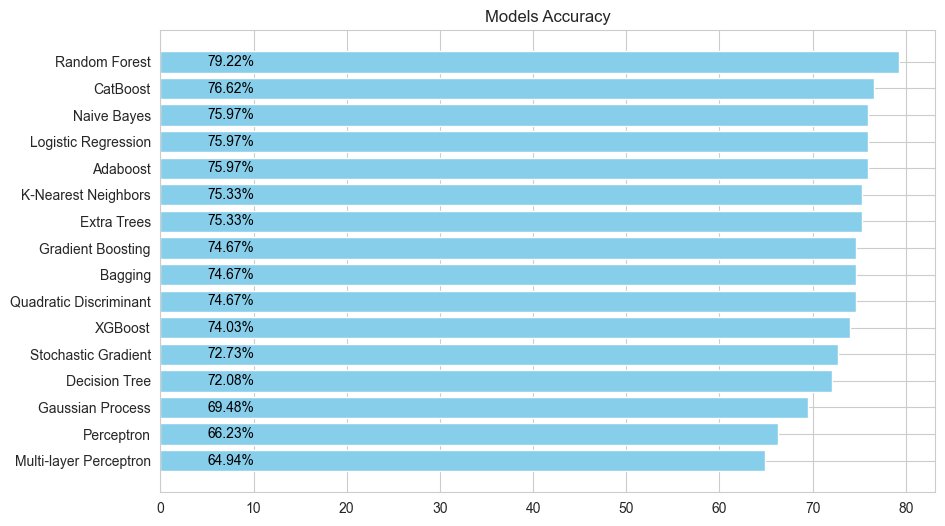

In [29]:
accuracy_df = pd.DataFrame({'Model Name': models, 'Accuracy': accuracies})
accuracy_df['Accuracy'] = round(accuracy_df['Accuracy']*100, 3)
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(accuracy_df['Model Name'], accuracy_df['Accuracy'], color='skyblue')
plt.title('Models Accuracy')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top

# Adding accuracy values inside each bar
for bar, accuracy in zip(bars, accuracy_df['Accuracy']):
    plt.text(5, bar.get_y() + bar.get_height() / 2, f'{accuracy:.2f}%', 
             va='center', ha='left', fontsize=10, color='black')

plt.savefig('Models_Accuracy.png', bbox_inches='tight')
plt.show()

### Confusion matrices

In [30]:
# Initialize lists to store TP, TN, FP, FN values
TP_list, TN_list, FP_list, FN_list = [], [], [], []

for cm in confusion_matrices:
    TP = cm[1][1] if len(cm) == 2 else 0
    TN = cm[0][0] if len(cm) == 2 else cm[1][1]
    FP = cm[0][1] if len(cm) == 2 else 0
    FN = cm[1][0] if len(cm) == 2 else 0
    
    TP_list.append(TP)
    TN_list.append(TN)
    FP_list.append(FP)
    FN_list.append(FN)

# Create the DataFrame
cm_data = {
    'Model Name': models,
    'TP': TP_list,
    'TN': TN_list,
    'FP': FP_list,
    'FN': FN_list
}

cm_df = pd.DataFrame(cm_data)
cm_df

,Model Name,TP,TN,FP,FN
0,K-Nearest Neighbors,30,86,11,27
1,Decision Tree,27,84,13,30
2,Random Forest,38,84,13,19
3,Naive Bayes,34,83,14,23
4,Logistic Regression,33,84,13,24
5,Stochastic Gradient,34,78,19,23
6,XGBoost,27,87,10,30
7,Perceptron,20,82,15,37
8,Gradient Boosting,28,87,10,29
9,Adaboost,34,83,14,23


### Classification Reports

In [31]:
# Initialize lists to store metrics
model_names = []
precision_list, recall_list, f1_list = [], [], []

for model, prediction in zip(models, predictions):
    if model == "XGBoost":
        report = classification_report(y_test.values.ravel(), prediction, output_dict=True)
    else:
        report = classification_report(y_test.values.ravel(), prediction, output_dict=True)
    
    precision = round(report['weighted avg']['precision']*100, 3)
    recall = round(report['weighted avg']['recall']*100, 3)
    f1 = round(report['weighted avg']['f1-score']*100, 3)
    
    model_names.append(model)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Create the DataFrame including accuracy and ROC-AUC score
cr_data = {
    'Model Name': model_names,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_list
}

cr_df = pd.DataFrame(cr_data)
cr_df

,Model Name,Precision,Recall,F1-Score
0,K-Nearest Neighbors,75.020,75.325,74.250
1,Decision Tree,71.395,72.078,70.756
2,Random Forest,78.946,79.221,78.955
3,Naive Bayes,75.538,75.974,75.477
4,Logistic Regression,75.543,75.974,75.336
5,Stochastic Gradient,72.388,72.727,72.507
6,XGBoost,73.846,74.026,72.477
7,Perceptron,64.553,66.234,63.916
8,Gradient Boosting,74.513,74.675,73.272
9,Adaboost,75.538,75.974,75.477


### All metrics

In [35]:
import dataframe_image as dfi

metrics = accuracy_df.merge(cr_df, on='Model Name', how='inner')
metrics = metrics.merge(cm_df, on='Model Name', how='inner')
metrics['Correct'] = metrics['TP'] + metrics['TN']
metrics['Wrong'] = metrics['FP'] + metrics['FN']
dfi.export(metrics, 'Metrics.png')
metrics

,Model Name,Accuracy,Precision,Recall,F1-Score,TP,TN,FP,FN,Correct,Wrong
0,Random Forest,79.221,78.946,79.221,78.955,38,84,13,19,122,32
1,CatBoost,76.623,76.345,76.623,75.774,32,86,11,25,118,36
2,Naive Bayes,75.974,75.538,75.974,75.477,34,83,14,23,117,37
3,Logistic Regression,75.974,75.543,75.974,75.336,33,84,13,24,117,37
4,Adaboost,75.974,75.538,75.974,75.477,34,83,14,23,117,37
5,K-Nearest Neighbors,75.325,75.020,75.325,74.250,30,86,11,27,116,38
6,Extra Trees,75.325,75.020,75.325,74.250,30,86,11,27,116,38
7,Gradient Boosting,74.675,74.513,74.675,73.272,28,87,10,29,115,39
8,Bagging,74.675,74.155,74.675,74.002,32,83,14,25,115,39
9,Quadratic Discriminant,74.675,74.177,74.675,73.841,31,84,13,26,115,39


## Conclusion

In this notebook, we conducted an extensive analysis of multiple machine learning models using the Pima Indians Diabetes dataset sourced from the National Institute of Diabetes and Digestive and Kidney Diseases. The dataset comprises diagnostic measurements of 768 women of Pima Indian heritage, with the primary objective of predicting diabetes presence. Throughout the analysis, we evaluated various models based on metrics such as accuracy, precision, recall, and F1-score. This comprehensive assessment allowed us to gain insights into the predictive capabilities of each model.

The findings highlighted that both Random Forest and CatBoost emerged as top performers, showcasing balanced metrics across accuracy, precision, recall, and F1-score. These models demonstrated strong potential in predicting diabetes presence among the population studied.

However, it's crucial to note that despite the high accuracy observed in some models, there were instances of false negatives. This emphasizes the necessity of further fine-tuning and possibly exploring ensemble methods or feature engineering to enhance the models' sensitivity in identifying positive cases.

The healthcare domain, especially diabetes prediction, demands a high level of accuracy in identifying individuals with the condition. Therefore, selecting an appropriate model involves considering the trade-offs between accuracy, precision, and recall while prioritizing the correct identification of positive cases.

This analysis serves as a foundational step towards developing a robust predictive model for diabetes detection in the Pima Indian population. Future work could delve deeper into feature selection, hyperparameter tuning, and potentially incorporating domain-specific knowledge to improve model performance further.